In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm import tqdm
import time
import os

sns.set_theme()

font = {'family' : 'Microsoft Yahei',
              'size'   : 10}
matplotlib.rc('font', **font)

label_fontsize = 12
title_fontsize = 14

plt.rcParams['axes.edgecolor'] = 'black'

In [3]:
h_path = "附件3、土壤湿度2022—2012年.xls"
e_path = "附件4、土壤蒸发量2012—2022年.xls"
NVDI_path = "附件6、植被指数-NDVI2012-2022年.xls"
R_path = "附件9、径流量2012-2022年.xlsx"
LAI_path = "附件10、叶面积指数（LAI）2012-2022年.xls"

In [ ]:
paths = [h_path, e_path, NVDI_path, R_path, LAI_path]
save_path = ["湿度.xls", "蒸发量.xls", "NDVI.xls", "径流量.xls", "LAI.xls"]
for j in range(len(paths)):
    df = pd.read_excel(paths[j])
    df_trans = pd.DataFrame()
    if j==4:
        df_trans = pd.read_excel(paths[j]).sort_values(by="日期")
    else:
        for i in df.groupby(by="年份"):
            df_trans = pd.concat((df_trans, i[1].drop(columns=["经度(lon)", "纬度(lat)"])), axis=0)
    df_trans = df_trans.reset_index(drop=True)
    df_trans.to_excel(save_path[j])

In [6]:
humidity = pd.read_excel(h_path)
evaporation = pd.read_excel(e_path)

In [7]:
def plot(df, cols, xticks, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    for i in cols:
        plt.plot(range(df.shape[0]), df[i], label=i)
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(*xticks)
    plt.show()

def plot_humidity(df, xlabel="年份", ylabel="湿度(kg/m2)", xticks=[[], []]):
    cols = ["10cm湿度(kg/m2)", "40cm湿度(kg/m2)", "100cm湿度(kg/m2)", "200cm湿度(kg/m2)"]
    plot(df, cols, xticks, xlabel, ylabel)

def plot_evaporation(df, xlabel="年份", ylabel="土壤蒸发量(mm)", xticks=[[], []]):
    cols = ["土壤蒸发量(mm)"]
    plot(df, cols, xticks, xlabel, ylabel)

def plot_rain(df, xlabel="年份", ylabel="降水量(mm)", xticks=[[], []]):
    cols = ["降水量(mm)"]
    plot(df, cols, xticks, xlabel, ylabel)

湿度  

In [8]:
h_trans = pd.DataFrame()
for i in humidity.groupby(by="年份"):
    h_trans = pd.concat((h_trans, i[1].drop(columns=["经度(lon)", "纬度(lat)"])), axis=0)
h_trans = h_trans.reset_index(drop=True)
h_trans

,月份,年份,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,1,2012,13.73,30.87,42.79,168.56
1,2,2012,13.00,30.87,42.79,168.56
2,3,2012,12.60,30.87,42.79,168.56
3,4,2012,11.97,30.73,42.76,168.56
4,5,2012,14.18,29.99,42.58,168.56
...,...,...,...,...,...,...
118,11,2021,13.91,52.17,93.43,164.49
119,12,2021,13.14,52.14,93.45,164.48
120,1,2022,12.45,52.14,93.45,164.48
121,2,2022,12.10,52.14,93.45,164.48


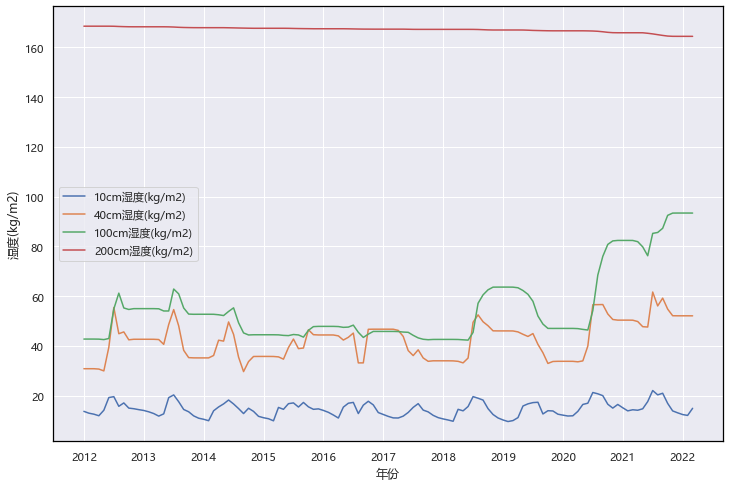

In [9]:
plot_humidity(h_trans, xticks=[range(0, 123, 12), range(2012, 2023)])

蒸发量

In [10]:
e_trans = pd.DataFrame()
for i in evaporation.groupby(by="年份"):
    e_trans = pd.concat((e_trans, i[1].drop(columns=["经度(lon)", "纬度(lat)"])), axis=0)
e_trans = e_trans.reset_index(drop=True)

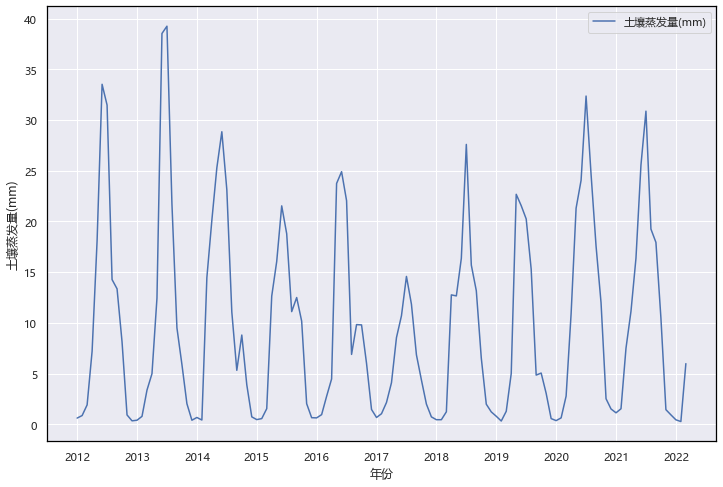

In [11]:
plot_evaporation(e_trans, xticks=[range(0, 123, 12), range(2012, 2023)])

降水量

In [13]:
dir_path = "附件8、锡林郭勒盟气候2012-2022"
select_cols = ["年份", "月份", "降水量(mm)", "平均风速(knots)", "平均气温(℃)"]
_, _, files = list(*os.walk(dir_path))
rain = pd.DataFrame()
for file in files:
    tmp = pd.read_excel("/".join([dir_path, file]))[select_cols]
    rain = pd.concat([rain, tmp], axis=0)
rain = rain.reset_index(drop=True)
# rain.to_excel("降水量.xls")

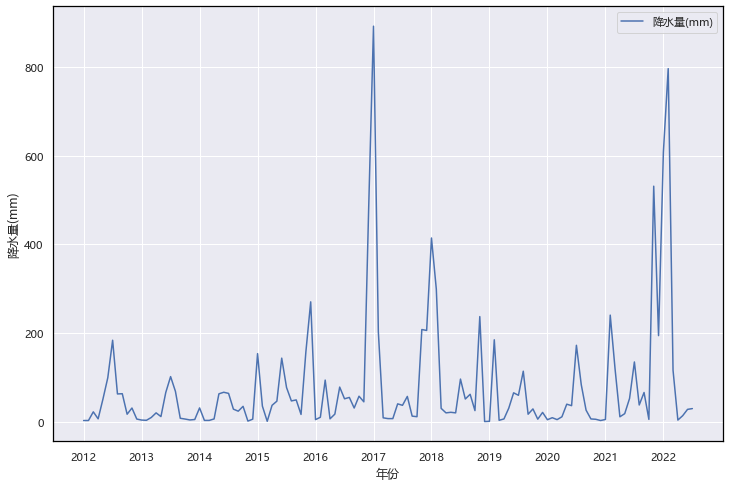

In [14]:
plot_rain(rain, xticks=[range(0, 123, 12), range(2012, 2023)])

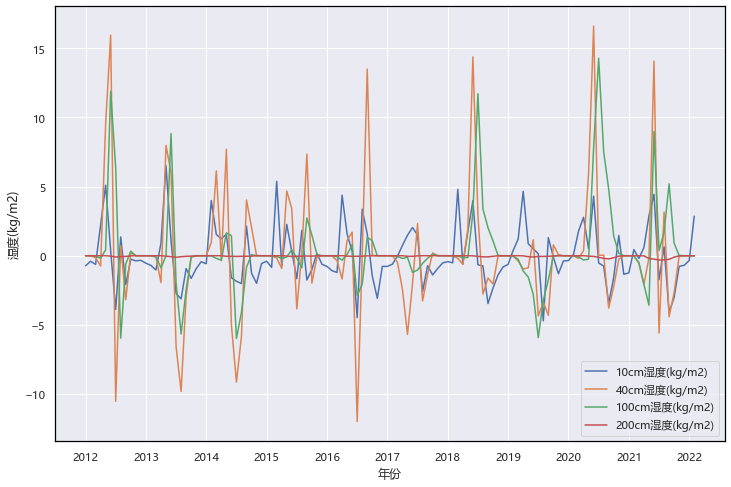

In [15]:
h_trans_diff = pd.concat([h_trans[["月份", "年份"]], h_trans.drop(columns=["月份", "年份"]).diff(axis=0)], axis=1).dropna(axis=0)
plot_humidity(h_trans_diff, xticks=[range(0, 123, 12), range(2012, 2023)])